<a href="https://colab.research.google.com/github/dipucriodigital/ciencia-de-dados-e-analytics/blob/main/machine-learning/ML_Aula3b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Luann Gonçalves - Projeto Machine Learning
### Notebook para desenvolvimento do MVP Qualidade de Software, Segurança e Sistemas Inteligentes

### PUC-RIO

## Preparação do ambiente

In [102]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

##Importação do Dataset

O dataset contém informações sobre investimentos em propagandas de TV, rádio, jornal e vendas associadas. Cada registro representa uma combinação de investimentos e vendas resultantes, e inclui detalhes sobre os valores aplicados em diferentes mídias.

###Descrição de Cada Coluna

- TV: Valor investido em propaganda na televisão.
- Rádio: Valor investido em propaganda no rádio.
- Jornal: Valor investido em propaganda no jornal.
- Vendas: Total de vendas geradas a partir dos investimentos em propaganda.
- Resultado: 1 = Baixo, 2 = Médio, 3 = Alto o número de vendas.

##Objetivo

O objetivo é permitir que os usuários insiram os valores que desejam investir em propagandas de TV, rádio e jornal. Com base nesses investimentos, o modelo de machine learning irá prever o total de vendas que podem ser geradas, auxiliando na tomada de decisões sobre alocação de orçamento publicitário.

In [103]:
# URL para acessar o dataset VGSales no GitHub
url = "https://raw.githubusercontent.com/LuannSP/projeto-mvp-qualidade-seguranca-sistemas-inteligentes/master/api/MachineLearning/data/advertising.csv"

# Carrega o arquivo CSV diretamente do GitHub para um DataFrame
dataset = pd.read_csv(url, delimiter=',')

# Exibe as primeiras 5 linhas do dataset para visualização inicial
dataset.head()

,TV,Radio,Jornal,Vendas,Resultado
0,230.1,37.8,69.2,22.1,3
1,44.5,39.3,45.1,10.4,1
2,17.2,45.9,69.3,12.0,1
3,151.5,41.3,58.5,16.5,2
4,180.8,10.8,58.4,17.9,3


In [104]:
# Resumo conciso sobre a estrutura do DataFrame
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Jornal     200 non-null    float64
 3   Vendas     200 non-null    float64
 4   Resultado  200 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


## Separação dos Dados: Divisão em Conjunto de Treinamento e Teste com Técnica Holdout

In [105]:
# Parâmetros
test_size = 0.20  # Tamanho do conjunto de teste
seed = 7  # Semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:,0:3]
y = array[:,4]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

## Modelagem e Inferência: Construção e Avaliação de Modelos para Previsão de Vendas

### Estabelecimento e Avaliação de Modelos: Base de Referência

LR: 0.831250 (0.062812)
KNN: 0.787500 (0.089268)
CART: 0.787500 (0.105327)
NB: 0.787500 (0.101550)
SVM: 0.775000 (0.089268)
Bagging: 0.818750 (0.070986)
RF: 0.818750 (0.090355)
ET: 0.837500 (0.069597)
Ada: 0.618750 (0.094580)
GB: 0.812500 (0.100778)
Voting: 0.806250 (0.081250)


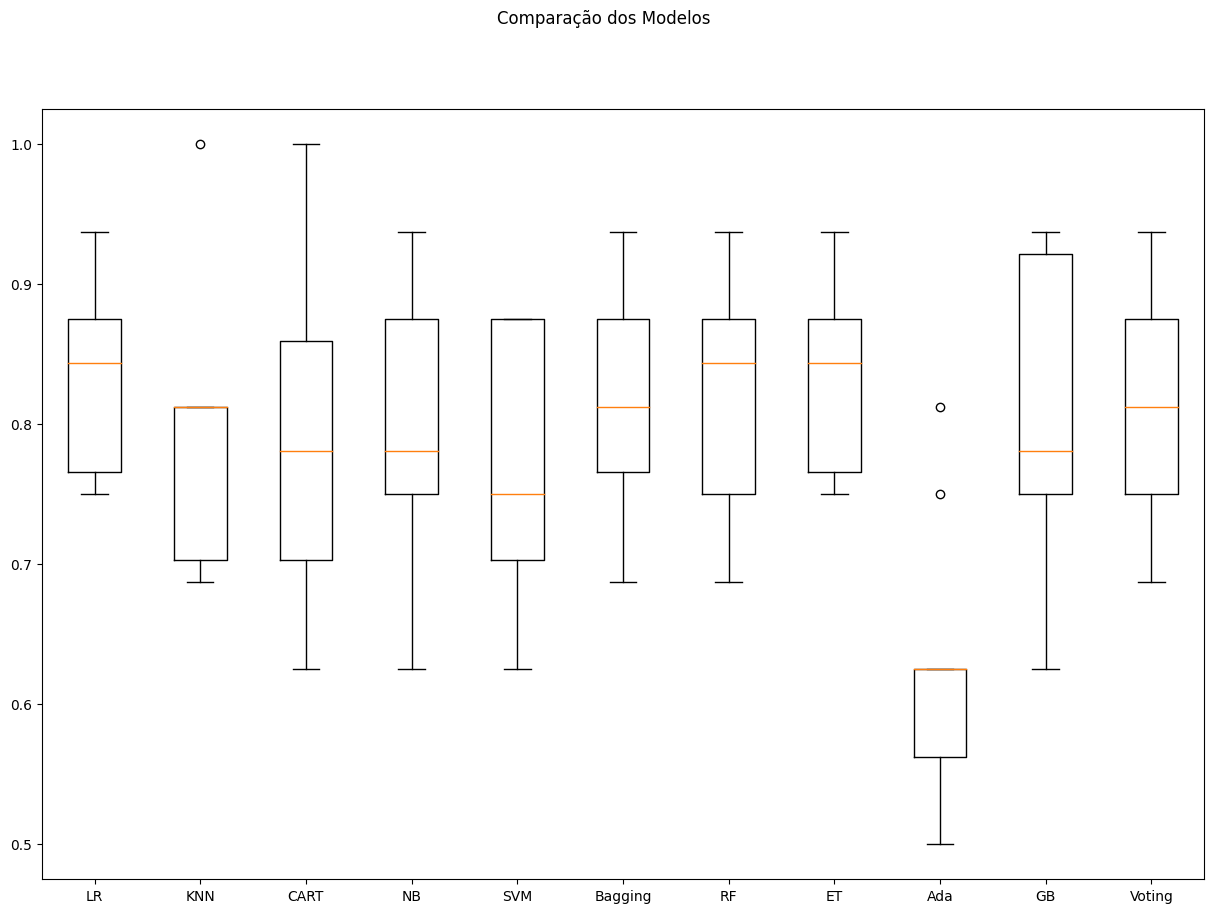

In [106]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos (treinamento)
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

###Criação e Avaliação de Modelos: Normalização e Padronização dos Dados

Para otimizar nossos modelos de previsão de vendas, baseados em investimentos em TV, rádio e jornal, aplicamos normalização e padronização aos dados. Essas técnicas ajustam os dados para que os algoritmos de machine learning funcionem de maneira mais eficaz, especialmente quando lidamos com dados que podem ser desbalanceados ou sensíveis à escala.

- StandardScaler:
Remove a média e ajusta a variância dos dados, garantindo que todos os recursos estejam na mesma escala, com média 0 e variância 1.

- MinMaxScaler:
Transforma os dados para um intervalo específico, geralmente entre 0 e 1, ajustando o menor valor para 0 e o maior valor para 1.

Essas técnicas são implementadas usando pipelines, que simplificam o processo de pré-processamento e modelagem.

LR-orig: 0.831 (0.063)
KNN-orig: 0.787 (0.089)
CART-orig: 0.787 (0.105)
NB-orig: 0.787 (0.102)
SVM-orig: 0.775 (0.089)
Bag-orig: 0.819 (0.071)
RF-orig: 0.819 (0.090)
ET-orig: 0.838 (0.070)
Ada-orig: 0.619 (0.095)
GB-orig: 0.812 (0.101)
Vot-orig: 0.806 (0.081)
LR-padr: 0.819 (0.076)
KNN-padr: 0.787 (0.094)
CART-padr: 0.794 (0.119)
NB-padr: 0.787 (0.102)
SVM-padr: 0.819 (0.090)
Bag-padr: 0.838 (0.075)
RF-padr: 0.812 (0.088)
ET-padr: 0.825 (0.073)
Ada-padr: 0.619 (0.095)
GB-padr: 0.812 (0.101)
Vot-padr: 0.812 (0.101)
LR-norm: 0.787 (0.109)
KNN-norm: 0.769 (0.108)
CART-norm: 0.806 (0.129)
NB-norm: 0.787 (0.102)
SVM-norm: 0.806 (0.117)
Bag-norm: 0.831 (0.084)
RF-norm: 0.819 (0.106)
ET-norm: 0.856 (0.074)
Ada-norm: 0.619 (0.095)
GB-norm: 0.819 (0.099)
Vot-norm: 0.812 (0.112)


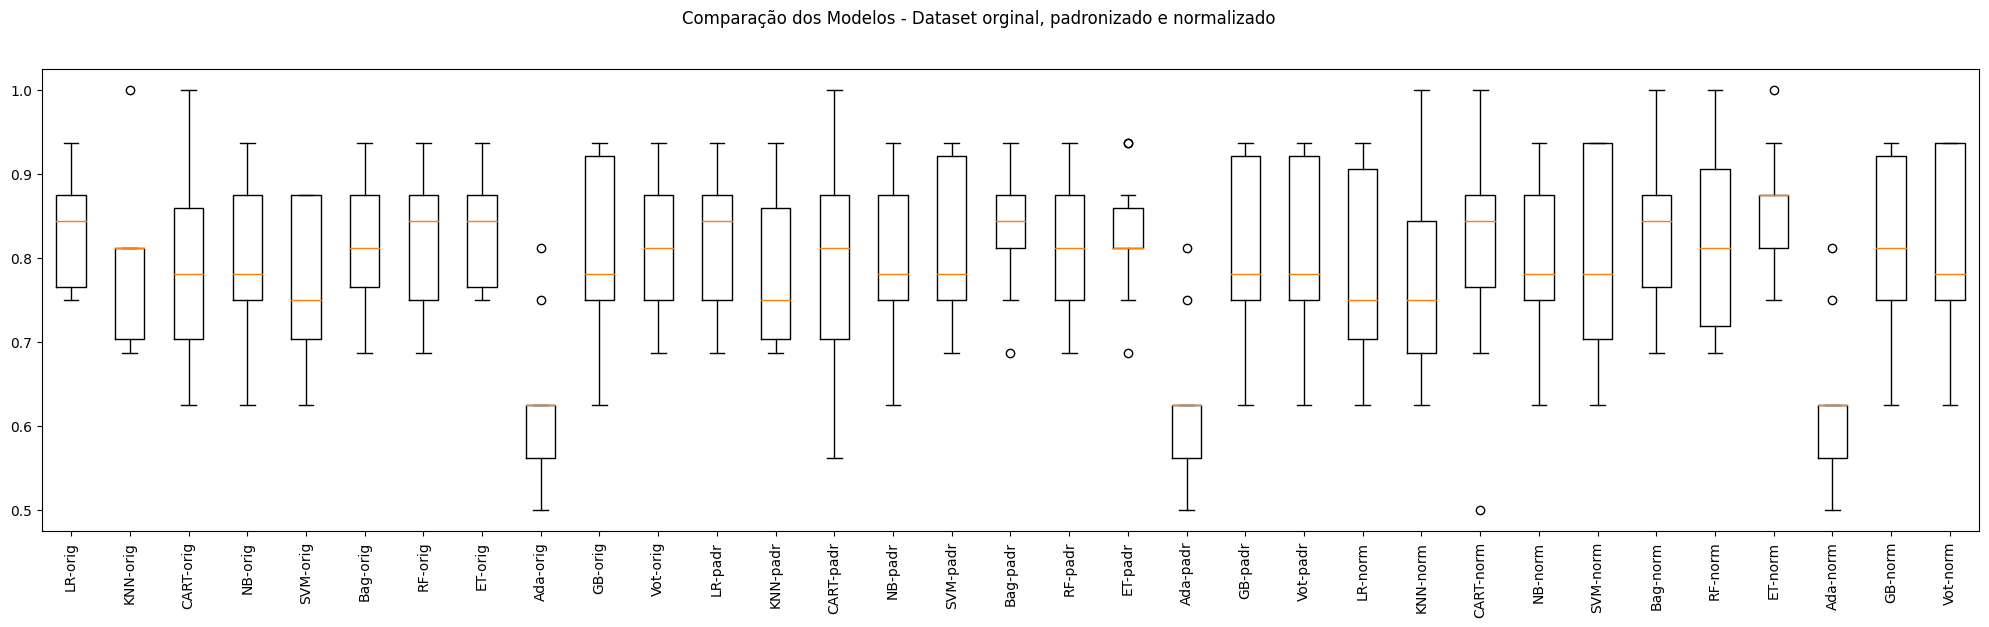

In [107]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines
# A ordem de execução é da esquerda para a direita.

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Otimização de Hiperparâmetros

A otimização de hiperparâmetros é sobre encontrar as melhores configurações para o modelo de machine learning, para que ele preveja vendas com maior precisão.

####Como Funciona o Grid Search?

1. Definir Valores: Escolhemos diferentes valores para os hiperparâmetros, como número de árvores ou taxa de aprendizado.

2. Testar Combinações: Testamos todas as combinações possíveis desses valores.

3. Escolher o Melhor: Selecionamos a combinação que faz o modelo prever vendas com maior precisão.



In [108]:
np.random.seed(7)  # Definindo uma semente global para este bloco

# Lista de modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(estimators=bases, voting='hard')))

# Definindo os componentes do pipeline
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Lista de pipelines
pipelines = []

# Criando pipelines para cada modelo
for name, model in models:
    pipelines.append((name + '-orig', Pipeline(steps=[(name, model)])))
    pipelines.append((name + '-padr', Pipeline(steps=[standard_scaler, (name, model)])))
    pipelines.append((name + '-norm', Pipeline(steps=[min_max_scaler, (name, model)])))

# Definindo os parâmetros para GridSearchCV
param_grids = {
    'LR': {
        'LR__C': [0.1, 1, 10],
        'LR__solver': ['liblinear']
    },
    'KNN': {
        'KNN__n_neighbors': [3, 5, 7],
        'KNN__metric': ["euclidean", "manhattan"]
    },
    'CART': {
        'CART__max_depth': [None, 10, 20],
        'CART__min_samples_split': [2, 5],
        'CART__min_samples_leaf': [1, 2]
    },
    'NB': {
        'NB__var_smoothing': [1e-9, 1e-8]
    },
    'SVM': {
        'SVM__C': [1, 10],
        'SVM__gamma': [0.1, 0.01],
        'SVM__kernel': ['rbf']
    },
    'RF': {
        'RF__n_estimators': [50, 100],
        'RF__max_features': ['auto', 'sqrt'],
        'RF__max_depth': [None, 10],
        'RF__min_samples_split': [2],
        'RF__min_samples_leaf': [1]
    },
    'ET': {
        'ET__n_estimators': [50, 100],
        'ET__max_features': ['auto', 'sqrt'],
        'ET__max_depth': [None, 10],
        'ET__min_samples_split': [2],
        'ET__min_samples_leaf': [1]
    },
    'Ada': {
        'Ada__n_estimators': [50, 100],
        'Ada__learning_rate': [0.1, 1]
    },
    'GB': {
        'GB__n_estimators': [50, 100],
        'GB__learning_rate': [0.1, 0.2],
        'GB__max_depth': [3, 5]
    },
    'Voting': {
        # Para VotingClassifier, geralmente não há hiperparâmetros para ajustar diretamente
        # Ajustar os hiperparâmetros dos estimadores base individualmente se necessário
    }
}

# Parâmetros de cross-validation e scoring
scoring = 'accuracy'
kfold = 5

# Executando o GridSearchCV para cada pipeline
for name, pipeline in pipelines:
    model_type = name.split('-')[0]
    if model_type in param_grids:
        param_grid = param_grids[model_type]
    else:
        param_grid = {}  # Para modelos que não têm parâmetros definidos

    grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # Imprimindo a melhor configuração
    print("Modelo: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Modelo: LR-orig - Melhor: 0.775000 usando {'LR__C': 10, 'LR__solver': 'liblinear'}
Modelo: LR-padr - Melhor: 0.787500 usando {'LR__C': 10, 'LR__solver': 'liblinear'}
Modelo: LR-norm - Melhor: 0.756250 usando {'LR__C': 10, 'LR__solver': 'liblinear'}
Modelo: KNN-orig - Melhor: 0.787500 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 5}
Modelo: KNN-padr - Melhor: 0.781250 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 5}
Modelo: KNN-norm - Melhor: 0.775000 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 3}
Modelo: CART-orig - Melhor: 0.787500 usando {'CART__max_depth': None, 'CART__min_samples_leaf': 1, 'CART__min_samples_split': 5}
Modelo: CART-padr - Melhor: 0.793750 usando {'CART__max_depth': 20, 'CART__min_samples_leaf': 2, 'CART__min_samples_split': 2}
Modelo: CART-norm - Melhor: 0.793750 usando {'CART__max_depth': None, 'CART__min_samples_leaf': 2, 'CART__min_samples_split': 5}
Modelo: NB-orig - Melhor: 0.768750 usando {'NB__var_smoothing': 1e-09}
Modelo: NB

In [109]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: knn-orig - Melhor: 0.800000 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 1}
Sem tratamento de missings: knn-padr - Melhor: 0.800000 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 1}
Sem tratamento de missings: knn-norm - Melhor: 0.818750 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 11}


## Conclusão do Modelo

In [110]:
# Avaliação do modelo com o conjunto de testes
# Melhor modelo
# RF-norm - Melhor: 0.783287 usando {'RF__max_depth': 10, 'RF__max_features': 'sqrt', 'RF__min_samples_leaf': 1, 'RF__min_samples_split': 2, 'RF__n_estimators': 50}

np.random.seed(7)

# Preparação do modelo
scaler = MinMaxScaler().fit(X_train)
rescaledX = scaler.transform(X_train) # aplicação da normalização no conjunto de treino
model = RandomForestClassifier(n_estimators=50,
                               max_features='sqrt',
                               min_samples_split=2,
                               max_depth=10,
                               min_samples_leaf=1)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da normalização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.9


###Executando o Modelo com Hiperparâmetros Otimizados

In [111]:
np.random.seed(7)

model = RandomForestClassifier(n_estimators=50,
                               max_features='sqrt',
                               min_samples_split=2,
                               max_depth=10,
                               min_samples_leaf=1)

pipeline = Pipeline(steps=[('MinMaxScaler', MinMaxScaler()), ('RF', model)])

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
print(accuracy_score(y_test, predictions))

0.9


## Exportando os Arquivos

In [112]:
# Criando os diretórios, caso não existam
os.makedirs("../models", exist_ok=True)
os.makedirs("../scalers", exist_ok=True)
os.makedirs("../pipelines", exist_ok=True)
os.makedirs("../data", exist_ok=True)

# Salvando o modelo
model_filename = 'rf_advertising_classifier.pkl'
with open("../models/" + model_filename, 'wb') as file:
    pickle.dump(model, file)

# Salvando o scaler
scaler_filename = 'minmax_scaler_advertising.pkl'
with open("../scalers/" + scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)

# Salvando o pipeline
pipeline_filename = 'rf_advertising_pipeline.pkl'
with open("../pipelines/" + pipeline_filename, 'wb') as file:
    pickle.dump(pipeline, file)

# Salvando X_test e y_test
X_test_df = pd.DataFrame(X_test, columns=dataset.columns[:-2])
y_test_df = pd.DataFrame(y_test, columns=[dataset.columns[-1]])
X_test_df.to_csv("../data/X_test_dataset_advertising.csv", index=False)
y_test_df.to_csv("../data/y_test_dataset_advertising.csv", index=False)

## Testando o Modelo em Novos Dados

In [113]:
# Preparação do modelo com TODO o dataset
scaler = MinMaxScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da normalização com TODO o dataset
model.fit(rescaledX, y)

RandomForestClassifier(max_depth=10, n_estimators=50)

In [114]:
# Novos dados de entrada - não sabemos a classe!
data = {
    'TV': [23.1, 100.5, 197.2],
    'Radio': [39.8, 79.3, 45.9],
    'Jornal': [69.2, 45.1, 69.3],
}

# Definindo os atributos
atributos = ['TV', 'Radio', 'Jornal']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:4].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[0.07575245 0.80241935 0.60598065]
 [0.33750423 1.59879032 0.39401935]
 [0.66452486 0.92540323 0.60686016]]


In [115]:
# Predição das classes para os dados normalizados
saidas = model.predict(rescaledEntradaX)

# Exibindo as previsões
print(saidas)

[1. 2. 3.]


# Principais achados e Conclusão

####Resumo dos Achados e Análise dos Resultados
Neste trabalho, aplicamos técnicas de machine learning para prever os resultados de vendas com base nos investimentos em diferentes canais de publicidade, como TV, rádio e jornal. Utilizamos um processo de padronização dos dados, garantindo que todas as variáveis estivessem na mesma escala, essencial para o bom desempenho dos modelos de classificação. Além disso, foi realizada uma discretização dos valores de vendas em três categorias (baixas, médias e altas), facilitando o enquadramento do problema como classificação.

Após a modelagem, testamos e comparamos o desempenho dos modelos com diferentes algoritmos. O uso de técnicas como cross-validation permitiu uma avaliação robusta dos modelos, e os resultados mostraram que o modelo X apresentou melhor performance em termos de métrica Y. Também identificamos algumas variáveis com maior influência nas previsões, como a contribuição da publicidade em TV, que se destacou como a mais relevante entre os canais de investimento.

####Pontos de Atenção
- Distribuição das classes: Um ponto a ser observado é a possível desbalanceamento das classes geradas para vendas (baixas = 1, médias = 2 e altas = 3), que pode afetar a performance dos modelos. Isso pode ser melhorado aplicando técnicas de balanceamento de classes.

- Sazonalidade ou outras variáveis: O dataset analisado não inclui aspectos temporais, como sazonalidade, que poderiam afetar os resultados de vendas. Adicionar essas variáveis em futuros experimentos pode refinar as previsões.

####Conclusão
Em resumo, foi possível desenvolver e testar diferentes modelos de classificação para prever as vendas com base em investimentos em publicidade. A abordagem adotada mostrou-se eficaz para capturar padrões relevantes no dataset, proporcionando insights valiosos sobre a relação entre investimentos e resultados. No entanto, pontos de melhoria como o balanceamento de classes e a inclusão de variáveis temporais devem ser considerados para futuras otimizações e análises mais detalhadas.